## The Sparks Foundation -- GRIP 2021 Internship Program
## Jan 2021 Batch -- M.Vetrivelan 
## Data Science and Business Analyst team
## Task 2 -- Prediction using Unsupervised ML 
## IRIS Data set 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
from collections import OrderedDict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Loding the csv file & Converted into dataframe

In [13]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Finding out distinct categories in target variable(Species)


### Custom Function creation  for find out distinct categories:

In [14]:
def distinct_categories(data):
    for x in data.columns:
       if  data[x].dtype ==  'object':
        result = data[x].value_counts()
        list_cat = (result.tolist())
        print(list_cat)
        print('------')
        print(f'length of feature {x} is ',len(result.tolist()))
        print(type(list_cat))
        print(result)

In [15]:
distinct_categories(df)

[50, 50, 50]
------
length of feature Species is  3
<class 'list'>
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


### Dropping the target and insignificant features:

In [16]:
x = df.drop('Id',axis=1,inplace=True)
x = df.drop('Species',axis=1)
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = df[['Species']]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Label encoding for target variable :

In [18]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)


C:\Users\APL M VETRIVEL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Data Pre Processing 

## Checking for missing/null values :

### Custom function Creation for replacing null values :

In [20]:
def replace_null(data,strategy = 'mean'):
    #col_data = data[col]
    missing_value_count_total = data.isna().sum().sum()  # Getting the total number of missing values
    print(f' Total number of missing values : {missing_value_count_total}')
    missing_values_count_column = data.isnull().sum()    # Getting the number of missing values with respect to column
    print(f' Total number of missing values per column : { missing_values_count_column}')
    total_cells = np.product(data.shape)                 # # Percent of data that is missing
    total_missing = missing_values_count_column.sum()
    missing_value_percent = (total_missing/total_cells) * 100  
    print(f'Total missing value percentage : {missing_value_percent}')
    if missing_value_percent == 2 or missing_value_percent < 2 :
        data.dropna()
    elif strategy == 'mean':
        data.fillna(data.mean(),inplace = True)
        
        
    elif strategy == 'median' :
        data.fillna(data.median(), inplace = True)
        
    else:
        print('Pass a correct Strategy')
    print('-------------------------------------------')
    print(f' Total number of missing values_after_replacement : {data.isna().sum().sum()}')
    print(f' Total number of missing values per column_after_replacement : {data.isnull().sum()}')
    total_cells = np.product(data.shape)                 # # Percent of data that is missing
    total_missing = missing_values_count_column.sum()
    print(f' Total missing value percentage_after_replacement : {(total_missing/total_cells) * 100}')
    return data

#### Calling the replace_null function and checking the new replaced values output dataframe.

In [21]:
replace_null(x)

 Total number of missing values : 0
 Total number of missing values per column : SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
Total missing value percentage : 0.0
-------------------------------------------
 Total number of missing values_after_replacement : 0
 Total number of missing values per column_after_replacement : SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
 Total missing value percentage_after_replacement : 0.0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Outliers treatment :
### Custom Function Creation for Outliers treatment

In [22]:
def replace_outlier(data,col,method = 'Quartile',strategy = 'median'):
    col_data = data[col]
    if method == 'Quartile' :   #to be followed when quartile is chosen
        Q2 = data[col].median()
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_lim = Q3 + (1.5*IQR)
        lower_lim = Q1 - (1.5*IQR)
        
        # Using SD to set values
    elif method == "Standard Deviation":
        col_mean = data[col].mean()
        col_sd = data[col].std()
        cutoff = col_sd *2
        upper_lim = col_mean + cutoff
        lower_lim = col_mean - cutoff
    
    else:
        print('Error : pass a correct method')
        # Printing outliers
    outliers = data.loc[(col_data < lower_lim ) | (col_data > upper_lim), col]
    outlier_density = round((len(outliers)/ len(data))*100,2)
    if len(outliers)== 0 :
        print(f' Feature \'{col}\' Does not have any outlier')
    else:
        print(f' Total number of outliers are : {len(outliers)}\n')
        print(f' Outlier Percentage : {outlier_density}\n')
        print(f' Outliers for \'{col}\' are : {np.sort(np.array(outliers))}\n')
        display(data[(col_data < lower_lim) | (col_data > upper_lim)])

            # replacing outliers
    if strategy == 'median':
        data.loc[(col_data < lower_lim) | (col_data > upper_lim), col ] = Q2
    elif strategy == 'mean' :
        data.loc[(col_data < lower_lim) | (col_data > upper_lim), col ] = col_mean
    else:
        print('ERROR : pass a corrrect strategy')
    return data
    
    

### Custom Function for Visualization for outlier plots:

In [23]:
def outlier_plots(data,col):
    col_data = data[col]
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
    kwargs = {'fontsize': 20, 'color':'Black'}
    # Box Plot
    sns.boxplot(data[col],ax=ax1,orient='v',color = 'red')
    ax1.set_title(col + " box Plot",**kwargs)
    ax1.set_xlabel('Box Plot',**kwargs)
    ax2.set_ylabel('Values',**kwargs)
    
    # Plotting histogram with outliers
    sns.distplot(data[col],ax=ax2,color = 'red',fit = sci.norm)
    ax2.axvline(data[col].mean(), color = 'green')
    ax2.axvline(data[col].median(), color = 'black',linestyle = 'dashed')
    ax2.set_title(col + " distribution with outlier",**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_ylabel('Values',**kwargs)
    
    # Plotting histogram without outliers
    y = replace_outlier(data,col)   # calling the previous function inside this function and save the output in y
    sns.distplot(y[col],ax=ax3,color = 'red',fit = sci.norm)
    ax3.axvline(y[col].mean(), color = 'green')
    ax3.axvline(y[col].median(), color = 'black',linestyle = 'dashed')
    ax3.set_title(col + " distribution without outlier",**kwargs)
    ax3.set_xlabel('Density',**kwargs)
    ax3.set_ylabel('Values',**kwargs)
    
    plt.show()
    
    
    

# Data Visualization:
## Data distribution before & after the outliers treatment

 Feature 'SepalLengthCm' Does not have any outlier


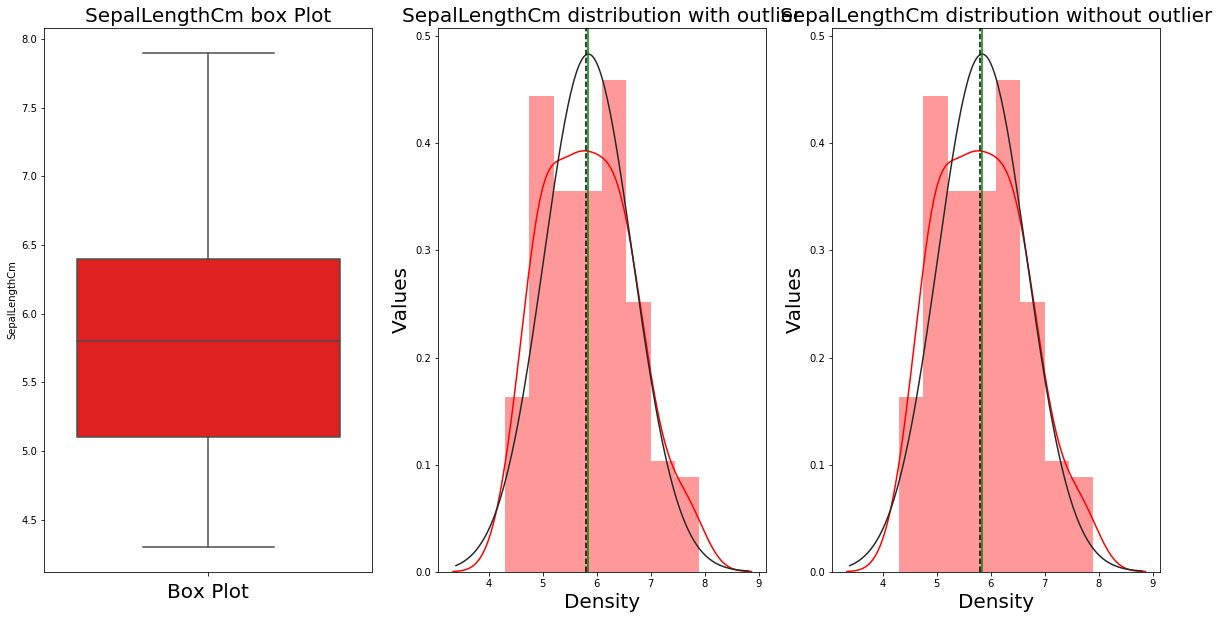

 Total number of outliers are : 4

 Outlier Percentage : 2.67

 Outliers for 'SepalWidthCm' are : [2.  4.1 4.2 4.4]



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


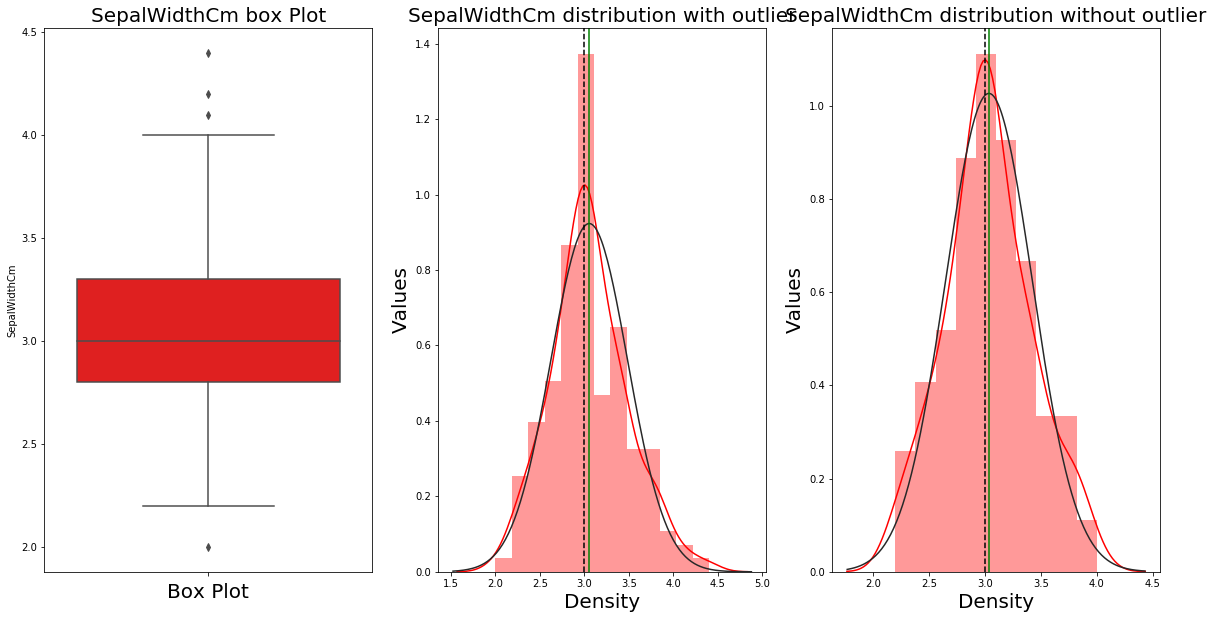

 Feature 'PetalLengthCm' Does not have any outlier


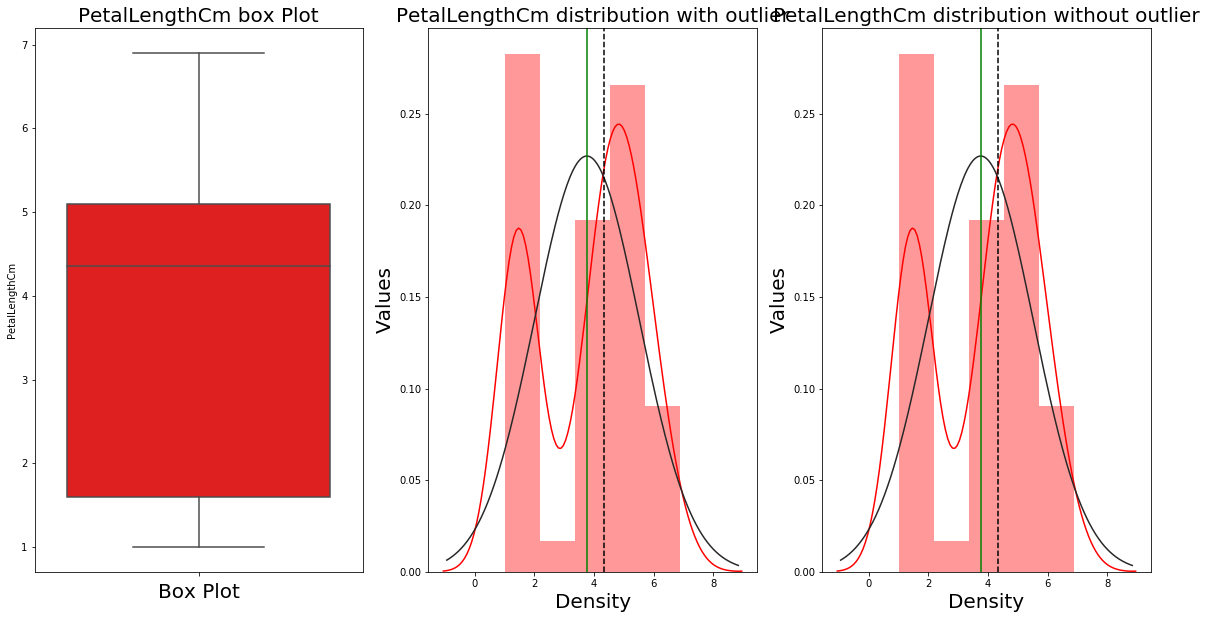

 Feature 'PetalWidthCm' Does not have any outlier


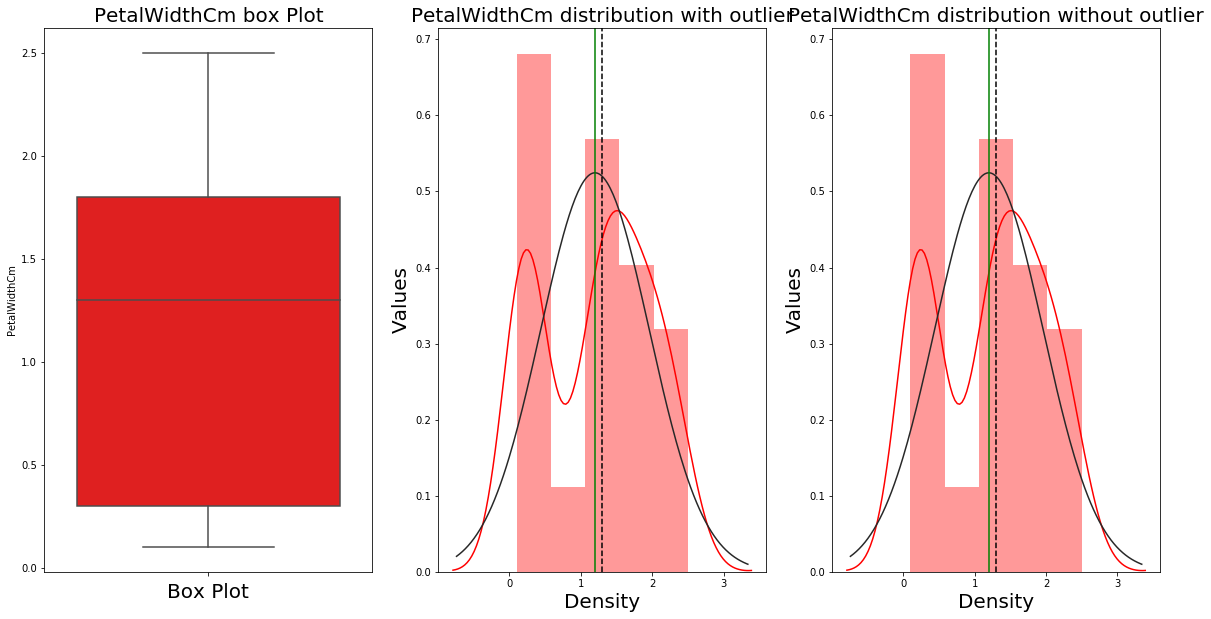

In [24]:
for col in x.columns:
    outlier_plots(x,col)

## Exploratory Data Analysis :
### Custom function creation for EDA report

In [25]:
def custom_summary(data):   
    output = []
    cus_data = data
    for col in cus_data.columns:
        stat = OrderedDict({"Column name": col,
                "Count": cus_data[col].count(),
                "Data type": cus_data[col].dtype,
                "Minimum": cus_data[col].min(),
                "Quartile 1": cus_data[col].quantile(0.25),
                "Mean": cus_data[col].mean(),
                "Median":cus_data[col].median(),
                "Quartile 3": cus_data[col].quantile(0.75),
                "Maximum": cus_data[col].max(),
                "Variance": cus_data[col].var(),
                "Standard Deviation":cus_data[col].std(),
                "Kurtosis": cus_data[col].kurtosis(),
                "Skewness": cus_data[col].skew(),
                "IQR": cus_data[col].quantile(0.75)-cus_data[col].quantile(0.25)
                })
        output.append(stat)
        if cus_data[col].skew() <-1:
            sk_label = "Higly Negatively Skewed"
        elif -1 <= cus_data[col].skew() <-0.5:
            sk_label = "Moderately Negative Skew"
        elif -0.5 <= cus_data[col].skew() < 0 :
            sk_label = "Fairly Negative Skew"
        elif 0 <= cus_data[col].skew() < 0.5:
            sk_label = "Fairly Symmetric Positive"
        elif 0.5 <= cus_data[col].skew() < 1 :
            sk_label = "Moderately Positive"
        elif cus_data[col].skew() > 1 :
            sk_label = "Highly Positive skew"
        else:
            sk_label = "Error"
         # Skewness Comment
        stat['skewness_comment'] = sk_label
        # Outlier Comment
        upper_lim = stat['Quartile 3'] + (1.5* stat['IQR'])
        lower_lim = stat['Quartile 1'] - (1.5* stat['IQR'])
        if len([x for x in data[col] if x < lower_lim or x > upper_lim])>0:
            outlier_comment = "Has Outliers"
        else:
            outlier_comment = "Has no Outliers"
        stat['outlier comments'] = outlier_comment
    output_df = pd.DataFrame(output)
    return output_df

### EDA report

In [26]:
custom_summary(x)

,Column name,Count,Data type,Minimum,Quartile 1,Mean,Median,Quartile 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,skewness_comment,outlier comments
0,SepalLengthCm,150,float64,4.3,5.1,5.843333,5.80,6.4,7.9,0.685694,0.828066,-0.552064,0.314911,1.3,Fairly Symmetric Positive,Has no Outliers
1,SepalWidthCm,150,float64,2.2,2.8,3.036000,3.00,3.3,4.0,0.151984,0.389851,-0.166821,0.150307,0.5,Fairly Symmetric Positive,Has no Outliers
2,PetalLengthCm,150,float64,1.0,1.6,3.758667,4.35,5.1,6.9,3.113179,1.764420,-1.401921,-0.274464,3.5,Fairly Negative Skew,Has no Outliers
3,PetalWidthCm,150,float64,0.1,0.3,1.198667,1.30,1.8,2.5,0.582414,0.763161,-1.339754,-0.104997,1.5,Fairly Negative Skew,Has no Outliers


## Scatter plot Interpretation between features :

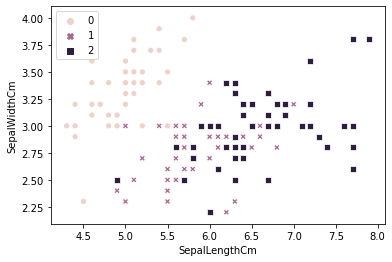

In [27]:
sns.scatterplot(x="SepalLengthCm",y = "SepalWidthCm",data = x, hue= y ,style=y)


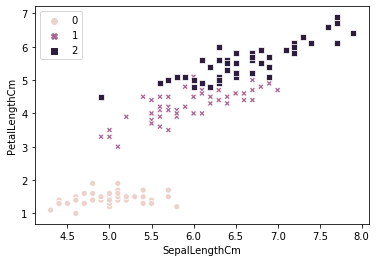

In [28]:
sns.scatterplot(x="SepalLengthCm",y = "PetalLengthCm",data = x, hue= y ,style=y)

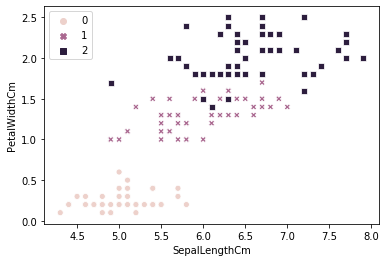

In [29]:
sns.scatterplot(x="SepalLengthCm",y = "PetalWidthCm",data = x,style=y , hue= y)

### Correlation Coefficient:

In [30]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.111724,0.871754,0.817954
SepalWidthCm,-0.111724,1.000000,-0.387514,-0.321513
PetalLengthCm,0.871754,-0.387514,1.000000,0.962757
PetalWidthCm,0.817954,-0.321513,0.962757,1.000000



#### NOTE :: From the above table we would say that (Sepal length & Petal length) , (Petal length & Petal width) are highly correlated , so we need to reduce the features to scale up the model performance.





## Dimensionality reduction : (PCA)

##  Scaling 

In [31]:
x1 = StandardScaler().fit_transform(x)
x1

array([[-9.00681170e-01,  1.19418523e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -9.26523021e-02, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  4.22082709e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.64715204e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.45155273e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  2.22365525e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  9.36817721e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  9.36817721e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.50019808e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.64715204e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.70892024e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  9.36817721e-01, -1.22754100e+00,
      

## Importing & Building the PCA :

In [32]:
from sklearn.decomposition import PCA

In [33]:
iris_pca = PCA()

In [34]:
p_components = iris_pca.fit_transform(x)

In [35]:
p_components

array([[-2.68174730e+00,  3.66133671e-01,  4.45380413e-02,
        -2.60370529e-02],
       [-2.72031093e+00, -1.08746809e-01, -1.83954304e-01,
         7.78504997e-02],
       [-2.89212967e+00, -9.72160939e-02,  5.08594838e-02,
         5.68506651e-03],
       [-2.75014213e+00, -2.75710039e-01,  5.08931463e-02,
        -8.36427023e-02],
       [-2.72479318e+00,  3.61673456e-01,  1.65332021e-01,
        -8.55011029e-02],
       [-2.27111600e+00,  7.63522696e-01,  2.73893901e-01,
        -5.53592825e-02],
       [-2.82031788e+00, -6.58608489e-02,  2.96249454e-01,
        -5.46778212e-02],
       [-2.62548674e+00,  2.08090869e-01,  3.77975330e-02,
        -6.86021548e-02],
       [-2.89480194e+00, -5.30442211e-01,  1.70896176e-02,
        -2.84849054e-02],
       [-2.67729412e+00, -5.23331132e-02, -1.60693295e-01,
        -7.84376115e-02],
       [-2.50083134e+00,  6.91891778e-01,  2.47019198e-02,
        -5.35616073e-02],
       [-2.61227206e+00,  4.55878534e-02,  1.51851004e-01,
      

## Creating the PCA Components data frame:


In [36]:
p_components_df = pd.DataFrame(p_components, columns= ["pc1","pc2","pc3","pc4"])

In [37]:
p_components_df.head()

,pc1,pc2,pc3,pc4
0,-2.681747,0.366134,0.044538,-0.026037
1,-2.720311,-0.108747,-0.183954,0.077850
2,-2.892130,-0.097216,0.050859,0.005685
3,-2.750142,-0.275710,0.050893,-0.083643
4,-2.724793,0.361673,0.165332,-0.085501


### Check for correlation now :


In [38]:
p_components_df.corr()

,pc1,pc2,pc3,pc4
pc1,1.000000e+00,-3.731952e-16,-8.377487e-17,5.716931e-17
pc2,-3.731952e-16,1.000000e+00,-3.197718e-17,3.968647e-17
pc3,-8.377487e-17,-3.197718e-17,1.000000e+00,8.828048e-17
pc4,5.716931e-17,3.968647e-17,8.828048e-17,1.000000e+00


## Calculating Explained variance ratio & Cumulative sum of it :

In [39]:
iris_pca.explained_variance_ratio_

array([0.93004871, 0.04636712, 0.01802931, 0.00555486])

In [40]:
np.cumsum(iris_pca.explained_variance_ratio_ )

array([0.93004871, 0.97641583, 0.99444514, 1.        ])

### From the above values we can interpret that first two components itself tells the 97% information of the data.

## Scatter plot interpretation for PCA Components :

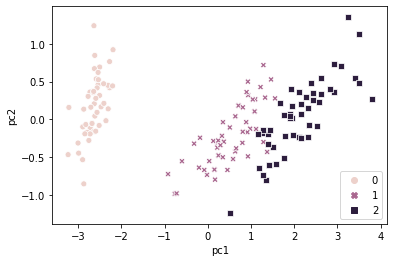

In [41]:
sns.scatterplot(x="pc1",y = "pc2",data = p_components_df,style=y , hue= y)

### Dropping the PC3 & PC4 Components as they didnt provide us that much information :

In [42]:
p_components_df = p_components_df.drop('pc3',axis = 1)
p_components_df = p_components_df.drop('pc4',axis = 1)
p_components_df.head()

,pc1,pc2
0,-2.681747,0.366134
1,-2.720311,-0.108747
2,-2.892130,-0.097216
3,-2.750142,-0.275710
4,-2.724793,0.361673


## Building multiple classification models :

In [43]:
final_report = {}                                   # Creating empty dictionary to return

def models_accuracy(model_name_array,df,target):
    for model_in in model_name_array:               # iterating over model_name_array where we stored the models to be implemented
        from sklearn.model_selection import train_test_split
        df_train,df_test,target_train,target_test = train_test_split(df,target,test_size=0.25)
        
        model=model_in()
        model.fit(df_train,target_train)             # fitting the model
        pred = model.predict(df_test)                # Prediction
        
        accuracy = accuracy_score(target_test,pred)  # Calculating accuracy and stored in accuracy variable
        final_report[model_in]=accuracy              # Creating new Key(Model name) and pair(accuracy score) values to dict
        
    
    final = pd.DataFrame.from_dict([final_report])   # Converting into dataframe(final)
    final_new = final.T                              # Using transpose we transform rows and columns
    final_new.columns = ['Accuracy Score']           # Adding column name Accuracy score
    return final_new

    
    
    
    
    
    

In [44]:
model_name_array = [LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier]


In [45]:
models_accuracy(model_name_array,x,y)

C:\Users\APL M VETRIVEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\APL M VETRIVEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,Accuracy Score
<class 'sklearn.linear_model.logistic.LogisticRegression'>,0.973684
<class 'sklearn.tree.tree.DecisionTreeClassifier'>,1.000000
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>,0.921053
